In [344]:
#Importing the libraries
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
import cv2
import statistics as stat
import pandas as pd
from sklearn.model_selection import train_test_split as split

### Neural network for regression

Program a neural network to learn a sine function. Alternatively, you may train the network to learn any function. From the module, the possible activation functions are:
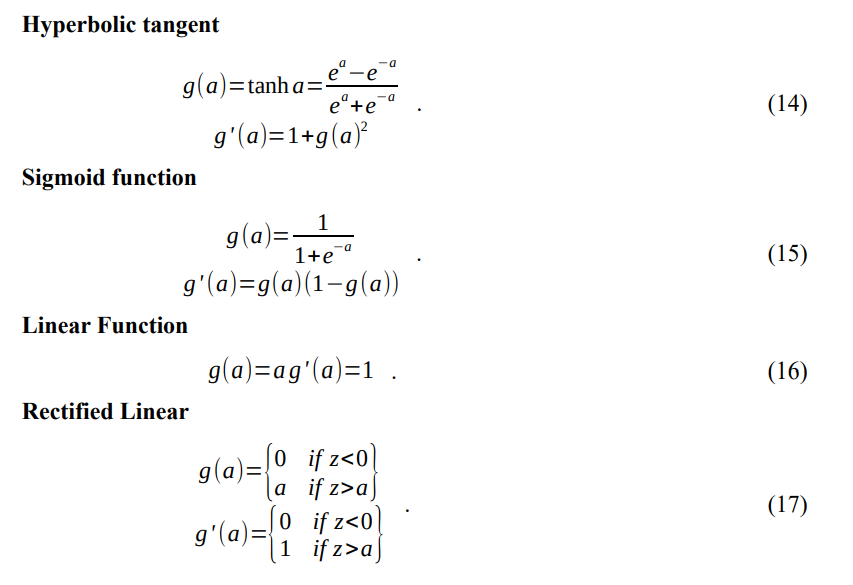

In [345]:
#Defining the functions

#For the sine function
#This serves as the model
def sine(x):
  y = np.sin(2*np.pi*x)
  y = (y - np.min(y))/(np.max(y)-np.min(y))
  y = np.reshape(y, (len(x), 1))
  return y

#For the sigmoid function
def sigmoid(a, derivative = False):
  if derivative == False:
    y = 1/(1 + np.exp(-a))   #1st derivative
  else:
    s = sigmoid(a)
    y = s * (1 - s)
  return y

#For the hyperbolic tangent
def tanh(a, derivative = False):
  if derivative == False:
    y = np.tanh(a) #1st derivative
  else:
    y = 1 + (np.tanh(a)) ** 2
  return y

#For the linear function
def linear (x, derivative = False):
  if derivative == False:
    y = x  #1st derivative
  else:
    y = 1
  return y

#For the rectified linear function
def rect_linear(x, derivative = False):
  if derivative == False:
    y = np.maximum(0,x)   #1st derivative
  else:
    y = np.maximum(0,1)
  return y

In [346]:
#Defining the input vector x with dimension d
def X(x,d):
  vector = []
  for i in range(d):
    vector.append(x ** i)
  vec = np.dstack(np.split(np.array(vector), d))
  vec = np.reshape(vec, (vec.shape[1], vec.shape[2]))
  return vec

#Defining the initial weights w_ji
def weights(input_size, hidden_size, output_size):
  factor = 0.01
  #weights connecting input layer to hidden layer
  omega0 = randn(hidden_size, input_size) * factor

  #weights connecting hidden layer to output layer
  omega1 = randn(output_size, hidden_size) * factor

  bias0 = np.ones(hidden_size)   #bias for hidden layer
  bias1 = np.ones(output_size)   #bias for output layer

  biases = {'omega0': omega0, 'omega1':omega1, 'bias0':bias0, 'bias1':bias1}
  return biases

#for RMSE computation
def RMSE_computation():
  pass

In [349]:
#Training the network

def Training(x, validation, weights, eta, activation_hidden, activation_out, error_threshold, error_tracker = False):
  omega0 = biases['omega0'].copy()
  omega1 = biases['omega1'].copy()
  bias0 = biases['bias0'].copy()
  bias1 = biases['bias1'].copy()

  RMSE = []
  epoch = 70000
  epoch_in = 1

  while True:
    #Evaluating activations of the hidden unit using equation(1)
    z_j= np.dot(x, omega0.T)
    hidden_layer = activation_hidden(z_j + bias0)

    #Evaluating the activation for the output units using equation(2)
    y_k = np.dot(hidden_layer, omega1.T)
    output_layer = activation_out(y_k + bias1)

    #Computing for root-mean-square error
    error = output_layer - validation
    new_error = np.sqrt(np.mean(error ** 2))
    RMSE.append(new_error)

    #Debugging
    if error_tracker == True:
      if epoch_in % 100 == 0:
        print('RMSE at epoch', epoch_in, ': ', new_error)

    #If iteration is done or the RMSE < threshold
    if new_error < error_threshold:
      break
    elif epoch_in >= epoch:
      break

    #Compute the error for each output unit
    delta_k = activation_out((y_k + bias1), derivative = True) * error

    #Compute the error for the hidden units
    delta_j = activation_hidden((z_j +bias0), derivative = True) *np.dot(delta_k, omega1)

    #Compute the error derivatives
    E_j = np.dot(x.T, delta_j).T
    E_k = np.dot(hidden_layer.T, delta_k).T

    #Update the weights
    omega0 += -eta * E_j
    omega1 += -eta * E_k

    epoch_in += 1

  return output_layer, np.array(RMSE), omega0, omega1

In [350]:
#Training
input_size = 6
hidden_size = 10
x = np.linspace(0,1,100)
x_vec = X(x, input_size)
biases = weights(input_size, hidden_size, 1)
validation = sine(x)
eta = 0.01
error_threshold = 0.03

#sigmoid, sigmoid
prediction, RMSE, omega0, omega1 = Training(x_vec, validation, biases, eta, sigmoid, sigmoid, error_threshold)
#linear, sigmoid
prediction1, RMSE1, omega0_1, omega1_1 = Training(x_vec, validation, biases, eta, linear, sigmoid, error_threshold)
#rect_linear_sigmoid
prediction2, RMSE2, omega0_2, omega1_2 = Training(x_vec, validation, biases, eta, rect_linear, sigmoid, error_threshold)
#sigmoid, rect_linear
prediction3, RMSE3, omega0_3, omega1_3 = Training(x_vec, validation, biases, eta, sigmoid,rect_linear, error_threshold)
#tanh, tanh
prediction4, RMSE4, omega0_4, omega1_4 = Training(x_vec, validation, biases, eta, tanh, tanh, error_threshold)
#sigmoid, tanh
prediction5, RMSE5, omega0_5, omega1_5 = Training(x_vec, validation, biases, eta, sigmoid, tanh, error_threshold)

Text(0.5, 1.0, 'Sigmoid --> Tanh')

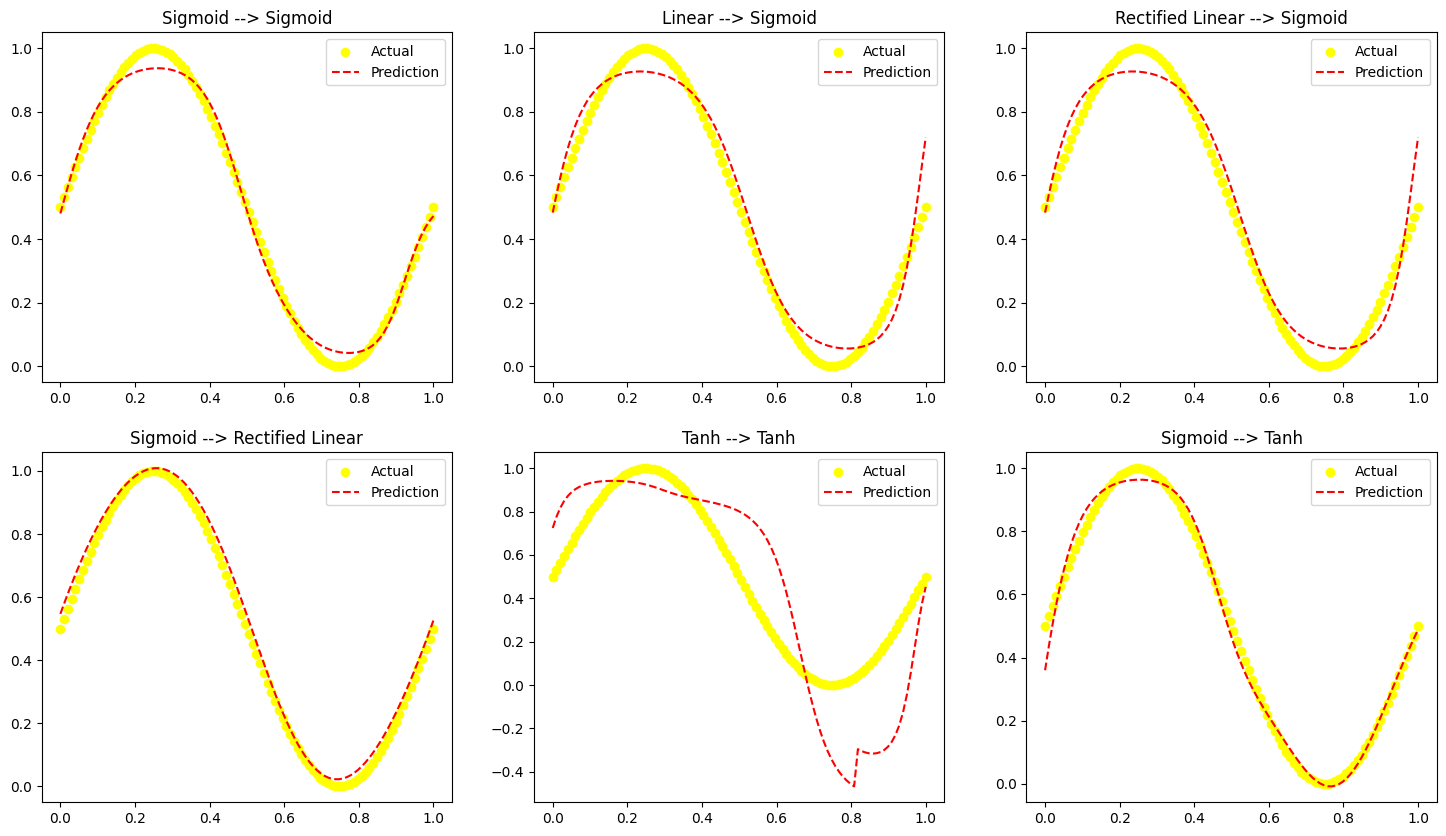

In [351]:
fig, ax = plt.subplots(2,3, figsize = (18,10))

ax[0,0].scatter(x, validation, label = 'Actual', color = 'yellow')
ax[0,0].plot(x, prediction,'--', label = 'Prediction', color = 'red')
ax[0,0].legend()
ax[0,0].set_title('Sigmoid --> Sigmoid')

ax[0,1].scatter(x, validation, label = 'Actual', color = 'yellow')
ax[0,1].plot(x, prediction1,'--', label = 'Prediction', color = 'red')
ax[0,1].legend()
ax[0,1].set_title('Linear --> Sigmoid')

ax[0,2].scatter(x, validation, label = 'Actual', color = 'yellow')
ax[0,2].plot(x, prediction2,'--', label = 'Prediction', color = 'red')
ax[0,2].legend()
ax[0,2].set_title('Rectified Linear --> Sigmoid')

ax[1,0].scatter(x, validation, label = 'Actual', color = 'yellow')
ax[1,0].plot(x, prediction3,'--', label = 'Prediction', color = 'red')
ax[1,0].legend()
ax[1,0].set_title('Sigmoid --> Rectified Linear')

ax[1,1].scatter(x, validation, label = 'Actual', color = 'yellow')
ax[1,1].plot(x, prediction4,'--', label = 'Prediction', color = 'red')
ax[1,1].legend()
ax[1,1].set_title('Tanh --> Tanh')

ax[1,2].scatter(x, validation, label = 'Actual', color = 'yellow')
ax[1,2].plot(x, prediction5,'--', label = 'Prediction', color = 'red')
ax[1,2].legend()
ax[1,2].set_title('Sigmoid --> Tanh')

Text(0.5, 1.0, 'Sigmoid --> Tanh')

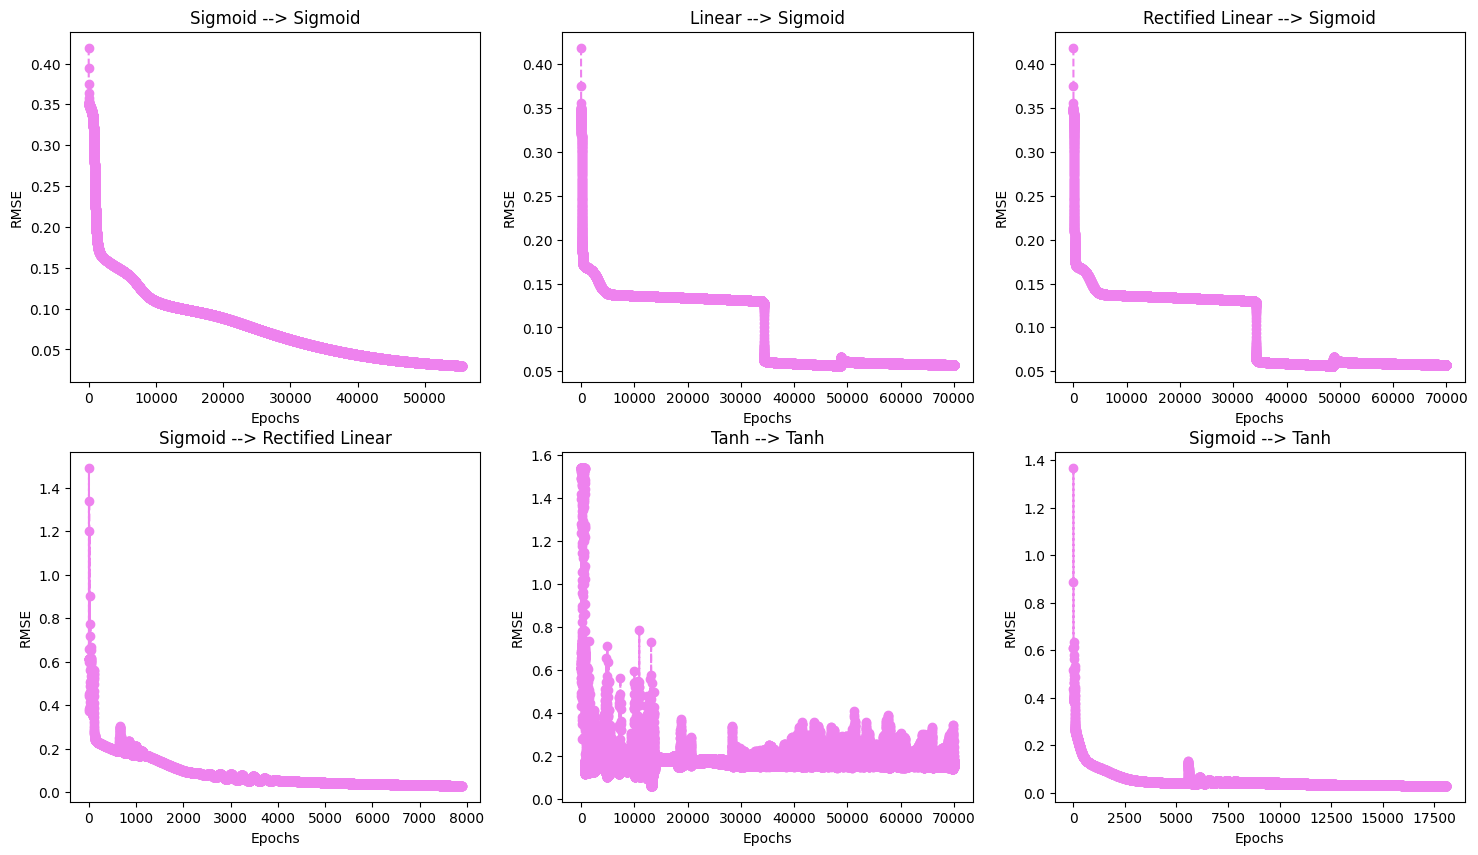

In [352]:
fig, ax = plt.subplots(2,3, figsize = (18,10))

ax[0,0].plot(np.arange(1, len(RMSE)+1, 1), RMSE,'--o', label = 'Prediction', color = 'violet')
ax[0,0].set_xlabel('Epochs')
ax[0,0].set_ylabel('RMSE')
ax[0,0].set_title('Sigmoid --> Sigmoid')

ax[0,1].plot(np.arange(1, len(RMSE1)+1, 1), RMSE1,'--o', label = 'Prediction', color = 'violet')
ax[0,1].set_xlabel('Epochs')
ax[0,1].set_ylabel('RMSE')
ax[0,1].set_title('Linear --> Sigmoid')

ax[0,2].plot(np.arange(1, len(RMSE2)+1, 1), RMSE2,'--o', label = 'Prediction', color = 'violet')
ax[0,2].set_xlabel('Epochs')
ax[0,2].set_ylabel('RMSE')
ax[0,2].set_title('Rectified Linear --> Sigmoid')

ax[1,0].plot(np.arange(1, len(RMSE3)+1, 1), RMSE3,'--o', label = 'Prediction', color = 'violet')
ax[1,0].set_xlabel('Epochs')
ax[1,0].set_ylabel('RMSE')
ax[1,0].set_title('Sigmoid --> Rectified Linear')

ax[1,1].plot(np.arange(1, len(RMSE4)+1, 1), RMSE4,'--o', label = 'Prediction', color = 'violet')
ax[1,1].set_xlabel('Epochs')
ax[1,1].set_ylabel('RMSE')
ax[1,1].set_title('Tanh --> Tanh')

ax[1,2].plot(np.arange(1, len(RMSE5)+1, 1), RMSE5,'--o', label = 'Prediction', color = 'violet')
ax[1,2].set_xlabel('Epochs')
ax[1,2].set_ylabel('RMSE')
ax[1,2].set_title('Sigmoid --> Tanh')

##Classification
Program another neural network to classify your fruit data in ML2 (Perceptron). Set aside half of the data from each class as the training set and the remaining half as the test set. Using the test set determine the accuracy of your network(number of correct classification/total test samples).

In [355]:
data_path = '/content/'
def Extract(filename1, filename2, features):
    df1 = pd.read_csv(data_path + filename1)
    df2 = pd.read_csv(data_path + filename2)

    df1_features = df1.loc[:,features]
    df2_features = df2.loc[:,features]

    return df1_features, df2_features

def vectorize(data, bias = 1):
    output = data.copy()
    output.insert(0,'bias', bias)
    return np.array(output)

def normalize(data_in1, data_in2):
    data_1 = data_in1.copy()
    data_2 = data_in2.copy()

    data_1.iloc[:,1] *= 1/255
    data_2.iloc[:,1] *= 1/255

    return data_1, data_2

In [356]:
# Loading the data
Corndata, SBdata = Extract('Cornfeatures.csv', 'Strawberryfeatures.csv', ['Feature1', 'Feature2'])
norm_Corndata, norm_SBdata = normalize(Corndata, SBdata)

# Adding bias to the data
Cornvector = vectorize(norm_Corndata, bias = 1)
SBvector = vectorize(norm_SBdata, bias = 1)

# Splitting into training and testing data
Corntrain, Corntest, SBtrain, SBtest = split(Cornvector, SBvector, train_size= .5)

# Creating validation data
Cornvalidation = np.tile(1, (len(Corntrain), 1))
SBvalidation = np.tile(0, (len(SBtrain), 1))

# Compiling training and validation data
Combined_train = np.concatenate((Corntrain, SBtrain))
Combined_validation = np.concatenate((Cornvalidation, SBvalidation))

###Hidden : Sigmoid, Output : Rectified Linear

In [358]:
input_size = len(Combined_train[0])

hidden_size = 10
learning_rate = 0.0005
error_threshold = 0.1
biases = weights(input_size, hidden_size, 1)
activation_function1= sigmoid
activation_function2= rect_linear

z, RMSE, omega_h, omega_o = Training(Combined_train, Combined_validation, biases, learning_rate, activation_function1, activation_function2, error_threshold)

In [359]:
#Function for classification
#Returns the accuracy of the network
def Classification(testing, validation, label1, label2, textlabel1, textlabel2, real_classification, omega_0, omega_1, afunc_hidden, afunc_out):
    bias0, bias1 = 1,1

    # Getting outputs of the hidden layer
    z_j = np.dot(testing, omega_0.T)
    hidden_layer = afunc_hidden(z_j + bias0)

    # Getting output
    a_k = np.dot(hidden_layer, omega_1.T)
    output_layer = afunc_out(a_k + bias1)

    # Rounding off to the nearest integer
    output_layer = (np.rint(output_layer)).astype(int)

    # Making the dataframe
    images = []
    for i in range(1, len(testing) + 1):
        images.append('Test Img '+str(i))

    df = pd.DataFrame({ 'Test image': images,
                        'Actual' : real_classification
    })
    df.insert(len(df.iloc[0]),'Prediction', None)

    df.loc[output_layer[:,0] == label1,'Prediction'] = textlabel1
    df.loc[output_layer[:,0] == label2,'Prediction'] = textlabel2

    accuracy = (len(df[df['Prediction'] == real_classification]))/len(df)

    return df, accuracy

In [360]:
Cornclassifications, Cornaccuracy = Classification(Corntest, Cornvalidation, 1, 0, 'Corn', 'Strawberry', 'Corn', omega_h, omega_o, activation_function1, activation_function2)
SBclassifications, SBaccuracy = Classification(SBtest, SBvalidation, 1, 0, 'Corn', 'Strawberry', 'Strawberry', omega_h, omega_o, activation_function1, activation_function2)
print('Corn Classification')
display(Cornclassifications)
print('------------------')
print('Strawberry Classification')
display(SBclassifications)
print('Summary of the classification:')
print('Accuracy (Corn): ', Cornaccuracy*100,'%')
print('Accuracy (Strawberry): ', SBaccuracy*100,'%')

Corn Classification


,Test image,Actual,Prediction
0,Test Img 1,Corn,Corn
1,Test Img 2,Corn,Corn
2,Test Img 3,Corn,Corn
3,Test Img 4,Corn,Corn
4,Test Img 5,Corn,Corn
5,Test Img 6,Corn,Corn
6,Test Img 7,Corn,Corn
7,Test Img 8,Corn,Corn
8,Test Img 9,Corn,Corn
9,Test Img 10,Corn,Corn


------------------
Strawberry Classification


,Test image,Actual,Prediction
0,Test Img 1,Strawberry,Strawberry
1,Test Img 2,Strawberry,Strawberry
2,Test Img 3,Strawberry,Strawberry
3,Test Img 4,Strawberry,Strawberry
4,Test Img 5,Strawberry,Strawberry
5,Test Img 6,Strawberry,Strawberry
6,Test Img 7,Strawberry,Strawberry
7,Test Img 8,Strawberry,Strawberry
8,Test Img 9,Strawberry,Strawberry
9,Test Img 10,Strawberry,Strawberry


Summary of the classification:
Accuracy (Corn):  100.0 %
Accuracy (Strawberry):  100.0 %


###Hidden:Sigmoid, Output: Sigmoid


In [362]:
#Training using sigmoid -> sigmoid
z1, RMSE1, omega_h1, omega_o1 = Training(Combined_train, Combined_validation, biases, eta, sigmoid, sigmoid, error_threshold)

Cornclassifications1, Cornaccuracy1 = Classification(Corntest, Cornvalidation, 1, 0, 'Corn', 'Strawberry', 'Corn', omega_h1, omega_o1, sigmoid, sigmoid)
SBclassifications1, SBaccuracy1 = Classification(SBtest, SBvalidation, 1, 0, 'Corn', 'Strawberry', 'Strawberry', omega_h1, omega_o1, sigmoid, sigmoid)
print('Corn Classification')
display(Cornclassifications1)
print('------------------')
print('Strawberry Classification')
display(SBclassifications1)
print('Summary of the classification:')
print('Accuracy (Corn): ', Cornaccuracy1*100,'%')
print('Accuracy (Strawberry): ', SBaccuracy1*100,'%')

Corn Classification


,Test image,Actual,Prediction
0,Test Img 1,Corn,Corn
1,Test Img 2,Corn,Corn
2,Test Img 3,Corn,Corn
3,Test Img 4,Corn,Corn
4,Test Img 5,Corn,Corn
5,Test Img 6,Corn,Corn
6,Test Img 7,Corn,Corn
7,Test Img 8,Corn,Corn
8,Test Img 9,Corn,Corn
9,Test Img 10,Corn,Corn


------------------
Strawberry Classification


,Test image,Actual,Prediction
0,Test Img 1,Strawberry,Strawberry
1,Test Img 2,Strawberry,Strawberry
2,Test Img 3,Strawberry,Strawberry
3,Test Img 4,Strawberry,Strawberry
4,Test Img 5,Strawberry,Strawberry
5,Test Img 6,Strawberry,Strawberry
6,Test Img 7,Strawberry,Strawberry
7,Test Img 8,Strawberry,Strawberry
8,Test Img 9,Strawberry,Strawberry
9,Test Img 10,Strawberry,Strawberry


Summary of the classification:
Accuracy (Corn):  100.0 %
Accuracy (Strawberry):  100.0 %


###Hidden:linear, Output:sigmoid

In [363]:
#Training using sigmoid -> sigmoid
z2, RMSE2, omega_h2, omega_o2 = Training(Combined_train, Combined_validation, biases, eta, linear, sigmoid, error_threshold)

Cornclassifications2, Cornaccuracy2 = Classification(Corntest, Cornvalidation, 1, 0, 'Corn', 'Strawberry', 'Corn', omega_h2, omega_o2, linear, sigmoid)
SBclassifications2, SBaccuracy2 = Classification(SBtest, SBvalidation, 1, 0, 'Corn', 'Strawberry', 'Strawberry', omega_h2, omega_o2, linear, sigmoid)
print('Corn Classification')
display(Cornclassifications2)
print('------------------')
print('Strawberry Classification')
display(SBclassifications2)
print('Summary of the classification:')
print('Accuracy (Corn): ', Cornaccuracy2*100,'%')
print('Accuracy (Strawberry): ', SBaccuracy2*100,'%')

Corn Classification


,Test image,Actual,Prediction
0,Test Img 1,Corn,Corn
1,Test Img 2,Corn,Corn
2,Test Img 3,Corn,Corn
3,Test Img 4,Corn,Corn
4,Test Img 5,Corn,Corn
5,Test Img 6,Corn,Corn
6,Test Img 7,Corn,Corn
7,Test Img 8,Corn,Corn
8,Test Img 9,Corn,Corn
9,Test Img 10,Corn,Corn


------------------
Strawberry Classification


,Test image,Actual,Prediction
0,Test Img 1,Strawberry,Strawberry
1,Test Img 2,Strawberry,Strawberry
2,Test Img 3,Strawberry,Strawberry
3,Test Img 4,Strawberry,Strawberry
4,Test Img 5,Strawberry,Strawberry
5,Test Img 6,Strawberry,Strawberry
6,Test Img 7,Strawberry,Strawberry
7,Test Img 8,Strawberry,Strawberry
8,Test Img 9,Strawberry,Strawberry
9,Test Img 10,Strawberry,Strawberry


Summary of the classification:
Accuracy (Corn):  100.0 %
Accuracy (Strawberry):  100.0 %


###Hidden: Rectified Linear, Output:Sigmoid

In [364]:
#Training using sigmoid -> sigmoid
z3, RMSE3, omega_h3, omega_o3 = Training(Combined_train, Combined_validation, biases, eta, rect_linear, sigmoid, error_threshold)

Cornclassifications3, Cornaccuracy3 = Classification(Corntest, Cornvalidation, 1, 0, 'Corn', 'Strawberry', 'Corn', omega_h3, omega_o3, rect_linear, sigmoid)
SBclassifications3, SBaccuracy3 = Classification(SBtest, SBvalidation, 1, 0, 'Corn', 'Strawberry', 'Strawberry', omega_h3, omega_o3, rect_linear, sigmoid)
print('Corn Classification')
display(Cornclassifications3)
print('------------------')
print('Strawberry Classification')
display(SBclassifications3)
print('Summary of the classification:')
print('Accuracy (Corn): ', Cornaccuracy3*100,'%')
print('Accuracy (Strawberry): ', SBaccuracy3*100,'%')

Corn Classification


,Test image,Actual,Prediction
0,Test Img 1,Corn,Corn
1,Test Img 2,Corn,Corn
2,Test Img 3,Corn,Corn
3,Test Img 4,Corn,Corn
4,Test Img 5,Corn,Corn
5,Test Img 6,Corn,Corn
6,Test Img 7,Corn,Corn
7,Test Img 8,Corn,Corn
8,Test Img 9,Corn,Corn
9,Test Img 10,Corn,Corn


------------------
Strawberry Classification


,Test image,Actual,Prediction
0,Test Img 1,Strawberry,Strawberry
1,Test Img 2,Strawberry,Strawberry
2,Test Img 3,Strawberry,Strawberry
3,Test Img 4,Strawberry,Strawberry
4,Test Img 5,Strawberry,Strawberry
5,Test Img 6,Strawberry,Strawberry
6,Test Img 7,Strawberry,Strawberry
7,Test Img 8,Strawberry,Strawberry
8,Test Img 9,Strawberry,Strawberry
9,Test Img 10,Strawberry,Strawberry


Summary of the classification:
Accuracy (Corn):  100.0 %
Accuracy (Strawberry):  100.0 %


###Hidden: Tanh, Output: Tanh

In [370]:
#Training using sigmoid -> sigmoid
z4, RMSE4, omega_h4, omega_o4 = Training(Combined_train, Combined_validation, biases, eta, tanh, tanh, error_threshold)

Cornclassifications4, Cornaccuracy4 = Classification(Corntest, Cornvalidation, 1, 0, 'Corn', 'Strawberry', 'Corn', omega_h4, omega_o4, tanh, tanh,)
SBclassifications4, SBaccuracy4 = Classification(SBtest, SBvalidation, 1, 0, 'Corn', 'Strawberry', 'Strawberry', omega_h4, omega_o4, tanh, tanh,)
print('Corn Classification')
display(Cornclassifications4)
print('------------------')
print('Strawberry Classification')
display(SBclassifications4)
print('Summary of the classification:')
print('Accuracy (Corn): ', Cornaccuracy4*100,'%')
print('Accuracy (Strawberry): ', SBaccuracy4*100,'%')

Corn Classification


,Test image,Actual,Prediction
0,Test Img 1,Corn,Corn
1,Test Img 2,Corn,Corn
2,Test Img 3,Corn,Corn
3,Test Img 4,Corn,Corn
4,Test Img 5,Corn,Corn
5,Test Img 6,Corn,Corn
6,Test Img 7,Corn,Corn
7,Test Img 8,Corn,Corn
8,Test Img 9,Corn,Corn
9,Test Img 10,Corn,Corn


------------------
Strawberry Classification


,Test image,Actual,Prediction
0,Test Img 1,Strawberry,Strawberry
1,Test Img 2,Strawberry,Strawberry
2,Test Img 3,Strawberry,Strawberry
3,Test Img 4,Strawberry,Strawberry
4,Test Img 5,Strawberry,Strawberry
5,Test Img 6,Strawberry,Strawberry
6,Test Img 7,Strawberry,Strawberry
7,Test Img 8,Strawberry,Strawberry
8,Test Img 9,Strawberry,Strawberry
9,Test Img 10,Strawberry,Strawberry


Summary of the classification:
Accuracy (Corn):  100.0 %
Accuracy (Strawberry):  100.0 %


###Hidden: Sigmoid, Output: Tanh

In [371]:
#Training using sigmoid -> sigmoid
z5, RMSE5, omega_h5, omega_o5 = Training(Combined_train, Combined_validation, biases, eta, sigmoid, tanh, error_threshold)

Cornclassifications5, Cornaccuracy5 = Classification(Corntest, Cornvalidation, 1, 0, 'Corn', 'Strawberry', 'Corn', omega_h5, omega_o5, sigmoid, tanh,)
SBclassifications5, SBaccuracy5 = Classification(SBtest, SBvalidation, 1, 0, 'Corn', 'Strawberry', 'Strawberry', omega_h5, omega_o5, sigmoid, tanh,)
print('Corn Classification')
display(Cornclassifications5)
print('------------------')
print('Strawberry Classification')
display(SBclassifications5)
print('Summary of the classification:')
print('Accuracy (Corn): ', Cornaccuracy5*100,'%')
print('Accuracy (Strawberry): ', SBaccuracy5*100,'%')

Corn Classification


,Test image,Actual,Prediction
0,Test Img 1,Corn,Corn
1,Test Img 2,Corn,Corn
2,Test Img 3,Corn,Corn
3,Test Img 4,Corn,Corn
4,Test Img 5,Corn,Corn
5,Test Img 6,Corn,Corn
6,Test Img 7,Corn,Corn
7,Test Img 8,Corn,Corn
8,Test Img 9,Corn,Corn
9,Test Img 10,Corn,Corn


------------------
Strawberry Classification


,Test image,Actual,Prediction
0,Test Img 1,Strawberry,Strawberry
1,Test Img 2,Strawberry,Strawberry
2,Test Img 3,Strawberry,Strawberry
3,Test Img 4,Strawberry,Strawberry
4,Test Img 5,Strawberry,Strawberry
5,Test Img 6,Strawberry,Strawberry
6,Test Img 7,Strawberry,Strawberry
7,Test Img 8,Strawberry,Strawberry
8,Test Img 9,Strawberry,Strawberry
9,Test Img 10,Strawberry,Strawberry


Summary of the classification:
Accuracy (Corn):  100.0 %
Accuracy (Strawberry):  100.0 %


Text(0.5, 1.0, 'Sigmoid --> Tanh')

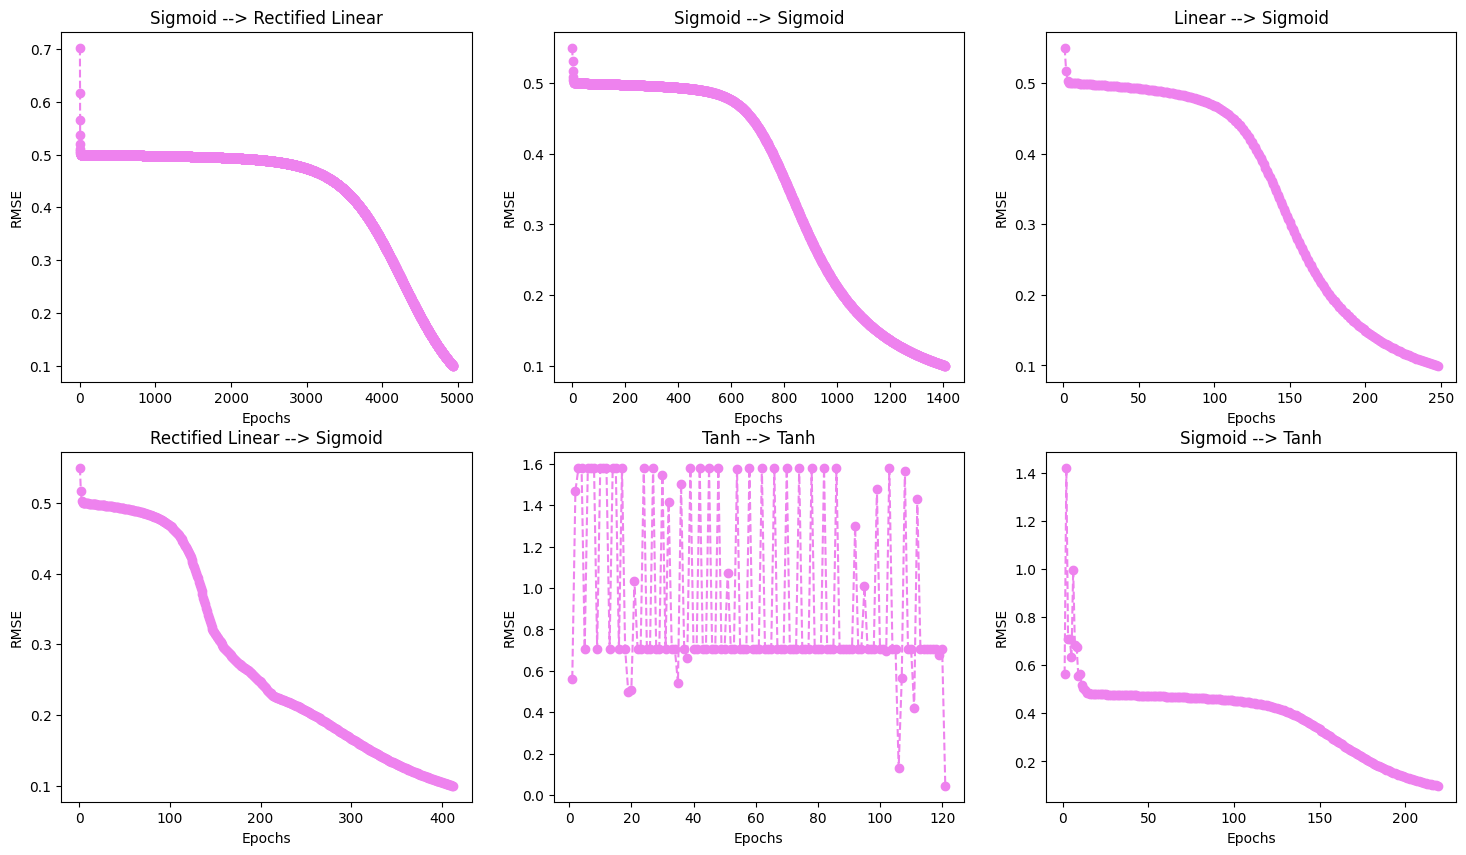

In [373]:
fig, ax = plt.subplots(2,3, figsize = (18,10))

ax[0,0].plot(np.arange(1, len(RMSE)+1, 1), RMSE, linestyle='--', marker = 'o', color='violet')
ax[0,0].set_xlabel('Epochs')
ax[0,0].set_ylabel('RMSE')
ax[0,0].set_title('Sigmoid --> Rectified Linear')

ax[0,1].plot(np.arange(1, len(RMSE1)+1, 1), RMSE1, linestyle='--', marker = 'o', color='violet')
ax[0,1].set_xlabel('Epochs')
ax[0,1].set_ylabel('RMSE')
ax[0,1].set_title('Sigmoid --> Sigmoid')

ax[0,2].plot(np.arange(1, len(RMSE2)+1, 1), RMSE2, linestyle='--', marker = 'o', color='violet')
ax[0,2].set_xlabel('Epochs')
ax[0,2].set_ylabel('RMSE')
ax[0,2].set_title('Linear --> Sigmoid')

ax[1,0].plot(np.arange(1, len(RMSE3)+1, 1), RMSE3, linestyle='--', marker = 'o', color='violet')
ax[1,0].set_xlabel('Epochs')
ax[1,0].set_ylabel('RMSE')
ax[1,0].set_title('Rectified Linear --> Sigmoid')

ax[1,1].plot(np.arange(1, len(RMSE4)+1, 1), RMSE4, linestyle='--', marker = 'o', color='violet')
ax[1,1].set_xlabel('Epochs')
ax[1,1].set_ylabel('RMSE')
ax[1,1].set_title('Tanh --> Tanh')

ax[1,2].plot(np.arange(1, len(RMSE5)+1, 1), RMSE5, linestyle='--', marker = 'o', color='violet')
ax[1,2].set_xlabel('Epochs')
ax[1,2].set_ylabel('RMSE')
ax[1,2].set_title('Sigmoid --> Tanh')